<h3>Linear Regression ML Fun</h3>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [7]:
dat_loc = (r'C:\Users\A8DPDZZ\Documents\Reading_Lit\BostonHouse.csv')
df = pd.read_csv(dat_loc)
df.shape

(506, 14)

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 720x504 with 0 Axes>

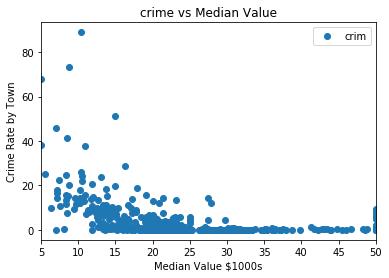

In [28]:
plt.figure(figsize=(10,7))
df.plot(x='medv',y='crim',style='o')
plt.title('crime vs Median Value')
plt.xlabel('Median Value $1000s')
plt.ylabel('Crime Rate by Town')
plt.show()

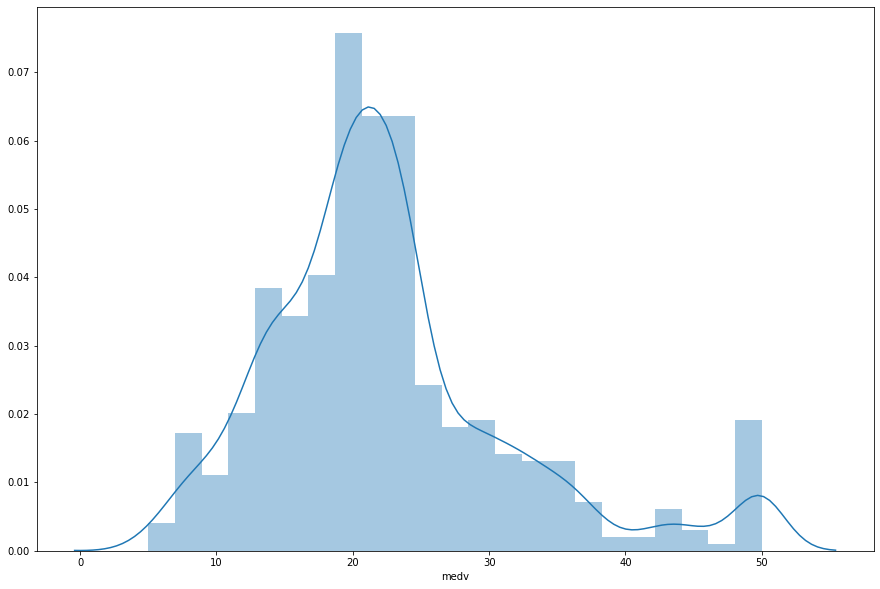

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['medv'])

In [29]:
#Normalize the dataset
X = df['medv'].values.reshape(-1,1)
y = df['crim'].values.reshape(-1,1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(regressor.intercept_)

[11.57510167]


In [34]:
print(regressor.coef_)

[[-0.3621449]]


In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df_new = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_new

,Actual,Predicted
0,0.06724,3.390627
1,9.23230,-6.532143
2,0.11425,3.245769
3,24.80170,8.569299
4,0.05646,3.897630
5,0.62739,4.368418
6,4.83567,4.114917
7,0.06151,4.802992
8,2.63548,5.744569
9,0.22876,4.839207


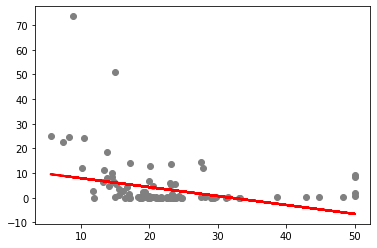

In [37]:
plt.scatter(X_test, y_test, color='grey')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 5.440197057370812
Mean Squared Error: 93.84037022535519
Root Mean Square Error: 93.84037022535519
